# Intro
  In this notebook I'm going to try reproduce the code of Chapter 2 of DLFS in Julia, just to see how it looks.

24/07/2022

In [1]:
using LinearAlgebra, Plots

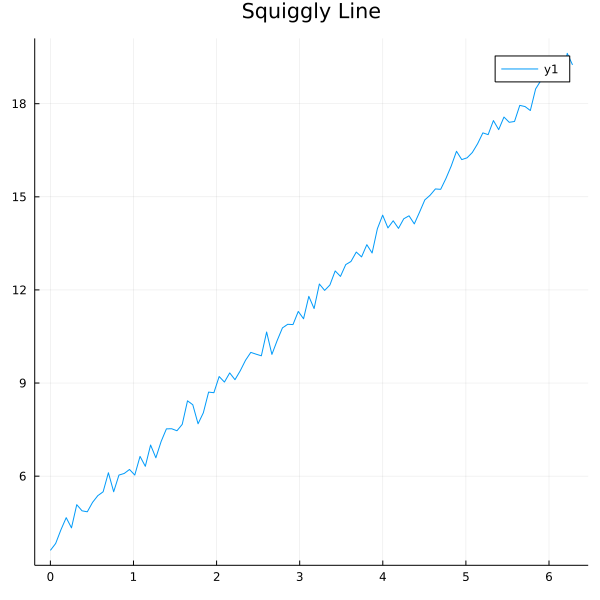

In [35]:
# Generate some linear regressable data
a_true = 2.5
b_true = 3.8

xs = range(0, 2pi, length=100)                       # Domain of the data
x_aug = hcat(xs, ones(100,1))                        # augment xs with a column of ones to get our intercept term in regression
ys = xs.*a_true .+ b_true .+ randn(100)*0.25         # Observed values

plot(xs, ys, title="Squiggly Line")

In [36]:
# Basic construction of linear regression
regress(x, β)  = x*β                         # the heart of the matter
regress(β)     = regress(x_aug, β)           # closure over the data, managed through multiple dispatch

l2(x,y)        = sum((y.-x).^2)              # Generic L2 Loss function between an x and y
l2(β)          = l2(regress(β), ys)          # closure over the particular data and functions in play

dβ(x,y,β)      = 2*transpose(transpose(y - x*β)*x)    # dl2/dβ
dβ(β)          = dβ(x_aug, ys, β)                      # closure over the data

dβ (generic function with 2 methods)

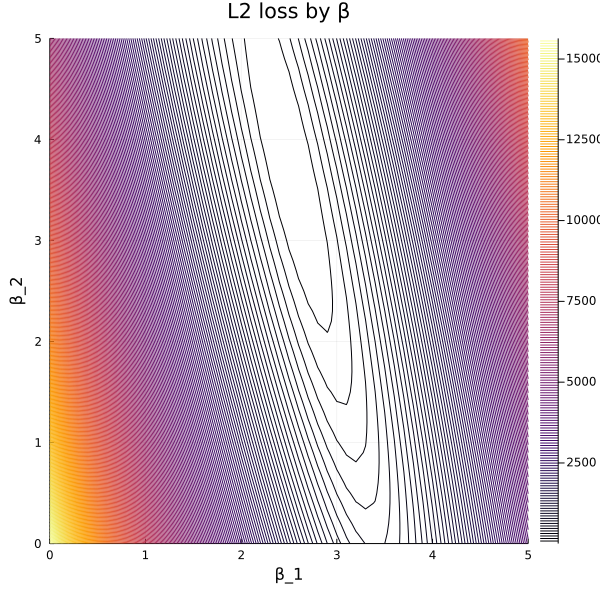

In [37]:
# Plot the loss function and its derivatives
default(size=(600,600), fc=:heat)

oxs, oys = 0:0.1:5, 0:0.1:5
l2z = Surface((x,y)->l2([x,y]), oxs, oys)         # Surface works nicely here because a scalar is returned
dβs = [dβ([x,y]) for x in oxs, y in oys]          # Gotta do a generator here because dβ returns a vector and I need to slice it out of the resulting matrix

contour(oxs, oys, l2z, levels=200, title="L2 loss by β", xlab="β_1", ylab="β_2")

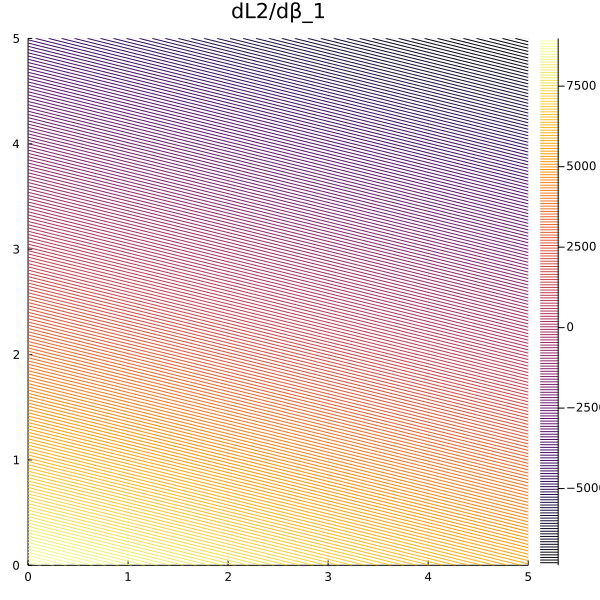

In [38]:
contour(oxs, oys, getindex.(dβs,1), levels=200, title="dL2/dβ_1")

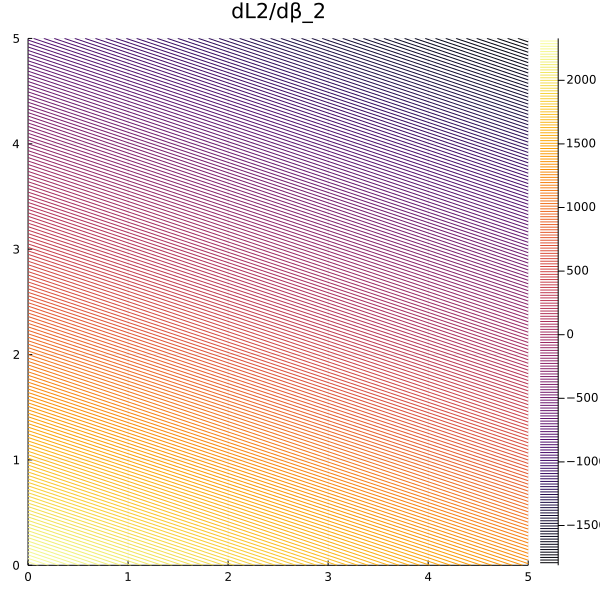

In [39]:
contour(oxs, oys, getindex.(dβs,2), levels=200, title="dL2/dβ_2")

In [40]:
# Lets make a baby gradient descent algorithm.
# Both f and df and functions only of the parameters, f is the base function, df is its first derivative

function ∇(f, df, initial_param, step_size=0.0002, boundary=0.00001)
    error = 1
    count = 1                                            # Avoid nasty non-convergences
    param = initial_param
    
    while (error>boundary && count<1000)
        param = param + df(param)*step_size
        error = f(param)
        #println(param)
        #println(error)
        count = count + 1
    end
    
    return param
end

∇ (generic function with 3 methods)

In [41]:
∇(l2, dβ, [1;1])

2-element Vector{Float64}:
 2.484131902103735
 3.8403770330082403